# Test for goodness of fit of the normal-probability model
***Taken from page 426 of Funamentals of Biostatistics, 8th Edition, by Bernard Rosner.***

For this example, we will utilize the test data from the following hypothetical experiment where diastolic blood-pressure measurements were collected at home in a community-wide screening program of 14,736 adults ages 30-69 in East Boston, MA, as part of a nationwide study to detect and treat hypertensive people. The people int he study were each screened in the home, with two measurements taken during one visit. A frequency distribution of the mean distolic blood pressure is given in the table (see ***df*** below) in 10-mm Hg intervals.

In general, we would like to test the assumption that the data come from an underlying normal distribution because **"standard methods of statistical inference can then be applied on these data"** 

How can the validity of this assumption be tested?

In [141]:
import scipy
from scipy.stats import chisquare, chi2_contingency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**This data is fictional:**

In [142]:
ranges = [(40, 49), (50, 59), (60, 69), (70, 79), (80, 89), (90, 99), (100, 109), (110, 119)]

f_obs = [57, 330, 2132, 4584, 4604, 2119, 659, 251]

df = pd.DataFrame(index=list(range(len(f_obs))), 
                  columns=['Group','Observed Frequency'], 
                  data=list(zip(ranges, f_obs)))
df

,Group,Observed Frequency
0,"(40, 49)",57
1,"(50, 59)",330
2,"(60, 69)",2132
3,"(70, 79)",4584
4,"(80, 89)",4604
5,"(90, 99)",2119
6,"(100, 109)",659
7,"(110, 119)",251


In [145]:
df['Group Average'] = df['Group'].apply(np.mean)
df.head()

,Group,Observed Frequency,Group Average
0,"(40, 49)",57,44.5
1,"(50, 59)",330,54.5
2,"(60, 69)",2132,64.5
3,"(70, 79)",4584,74.5
4,"(80, 89)",4604,84.5


The null hypothesis (H0) is that the data come from a normal distribution. 


<AxesSubplot:xlabel='Group Average'>

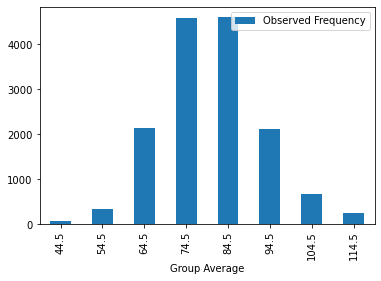

In [146]:
# plot just to see if it resembles the normal distribution at all
df.plot.bar(x='Group Average', y='Observed Frequency')

In [147]:
## calculate average and standard deviation
data = np.repeat(a=df['Group Average'], 
                 repeats=df['Observed Frequency']) # create frequency count data
u = np.mean(data)
s = np.std(data)
print(u, s)

80.51248642779588 12.125199950491224


In [149]:
# calculate total samples
n = df['Observed Frequency'].sum()

# create normal distribution from f_obs mean and std. dev. 
norm = scipy.stats.norm(u, s)

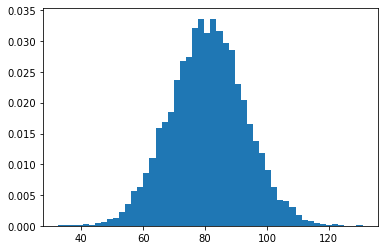

In [150]:
# plot the modeled normal distribution pdf based on mean and standard deviation of sample data
r = norm.rvs(size=10000)
plt.hist(r, bins=50, density=True);

The value chi-squared test statistic is calculated across all rows in the table as: 

\begin{equation*}
\left( \sum_{i=1}^n (O_i-E_i)^2/E_i \right)
\end{equation*}

This means we need to calculate the **Expected Frequency**. The expected frequency is calculated from the normal distribution based on the parameters derived from the sample data (mean=u, standard deviation=s). We use this distribution's CDF to calculate the probability of getting a value within each "Group" (determined by the group's end points), and then multiply that probability density by the total sample size, n, to get the **Expected Frequency** for each blood-pressure measurement group.

The requirements for using this test are:
- A) no more than 1/5 of the expected values are < 5
- B) no expected value is < 1

Both of these criteria are met in this example.

In [154]:
# calculate expected frequency and chi-squared test statistic
df['Expected Frequency'] = df.apply(lambda x: (norm.cdf(x['Group'][1]) - norm.cdf(x['Group'][0])) * n , axis=1)

In [155]:
# calculate degrees of freedom 
dof = len(df) - 2 - 1 # g - k - 1, where g = cell count, k = parameters (two: mean and std. dev)

# calculate chi-squared test statistic and associated p-value
from scipy.stats import chisquare
chisq, pvalue = chisquare(f_obs=df['Observed Frequency'], f_exp=df['Expected Frequency'], ddof=dof)

print(chisq, pvalue)

564.6737684529562 2.413510222813826e-123


p < 0.001, thus we can reject the null hypothesis (H0: the sample comes from a normal distribution) as the results are highly significant. 